# Machine Learning - Exploratory analysis

In this file I will leave the working tools used for exploratory analysis in data-sets in order to use them in Machine Learning algorithms.

For demonstration purposes of these tools, the 'Titanic.csv' dataset obtained through the Kaggle portal will be used. 
* URL: 'https://www.kaggle.com/c/titanic'

This data has been already splitted in two groups, a train set and a test set. For this script only the train set will be used.

According to the overview on Kaggle the challenge of this dataset is to 'build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).'

## Libraries

In [1]:
# Global libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import pandas as pd
import cufflinks as cf

# Individual specifications
# Matplotlib 
%matplotlib inline

# Seabron
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

# Sympy
x = sp.symbols('x')

# Cufflinks
cf.go_offline()

### Using 'Pandas' for reading the .csv file and working with it

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
# Visualizing the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Begenning of exploratory Analysis

The first step that I do when preparing the data for later use in Machine Learning algorithms is to check the type and amount of NaN data, as well as its relevance to the objective of the exercise.

This can be achieved by using Pandas' build in methods .info() or .describe() but I prefer to visualize that data, that gives me a better understanding of the situation, so I will use a heatmap from Seaborn exposing the missing values of the features.

<AxesSubplot:>

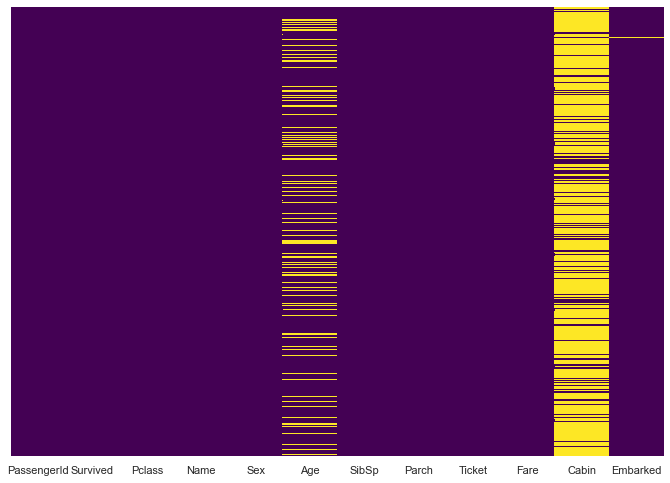

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now that the data is displayed, it is easier to make decisions about how to treat the missing data for the 'Age', 'Cabin' and 'Embarked' features.

By eye, the missing information from the 'Age' feature represents 20% of the total information, so it can be replaced by the average (the process will be explained below).

In the same way, the only missing data from the 'Embarked' feature will be replaced by the mean.

As for the 'Cabin' feature, it has between 80% to 90% missing information, so it would not be correct and would generate bad predictions to substitute the missing information for any parameter that returns the evaluation of the present information (the process will be explained below).

## Figure 1

<AxesSubplot:xlabel='Survived', ylabel='count'>

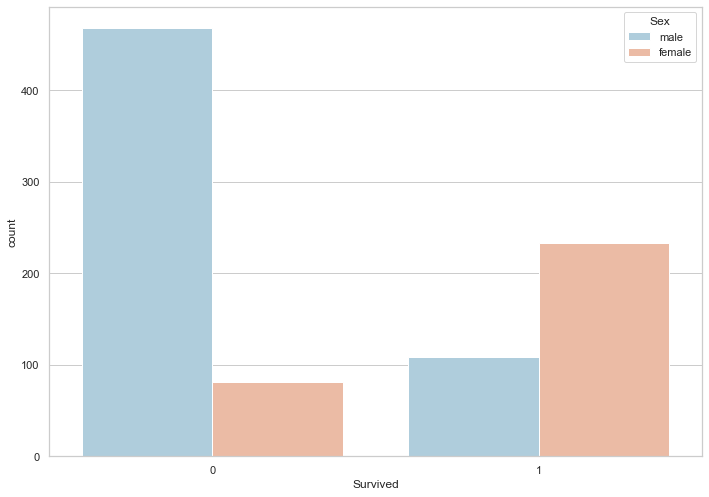

In [5]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

From the graph above it is evident that the majority of people who did not survive the sinking of the Titanic were men. This is consistent since in an emergency situation women and children are the priority.

## Figure 2

<AxesSubplot:xlabel='Survived', ylabel='count'>

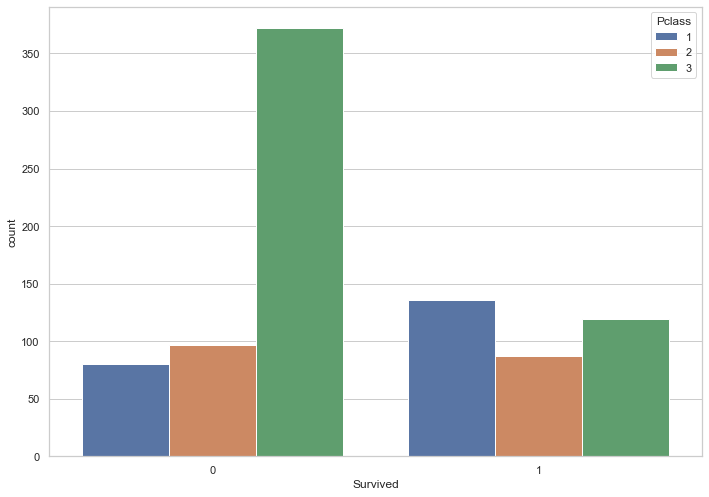

In [6]:
sns.countplot(x='Survived', data=train, hue='Pclass')

As in Figure 1, the graph shows a count of people according to the survival category, only in this case it is segmented from the classes. This shows that by a large margin most of the people who died belonged to class number 3, the cheapest and the last to board the lifeboats.

This is reflected in the superiority, which should be noted that it is not very great, of class 1, being the ones with the largest number of survivors.

## Figure 3

In [7]:
train['Age'].iplot(kind='hist', bins=30)

The histogram in Figure 3 was chosen to study the age distribution of the people on board the Titanic. As you can see, most of them were between 20 and 32 years old.

Keep in mind that this file is not the final answer to the question posed for this dataset, its objective is to show the tools and my personal process of cleaning data from a task.

The analysis of the relationship between the variables of this project from graphs could be extended infinitely.

# Cleaning the data

Let's go back to the heatmap done in the first lines of the code.

<AxesSubplot:>

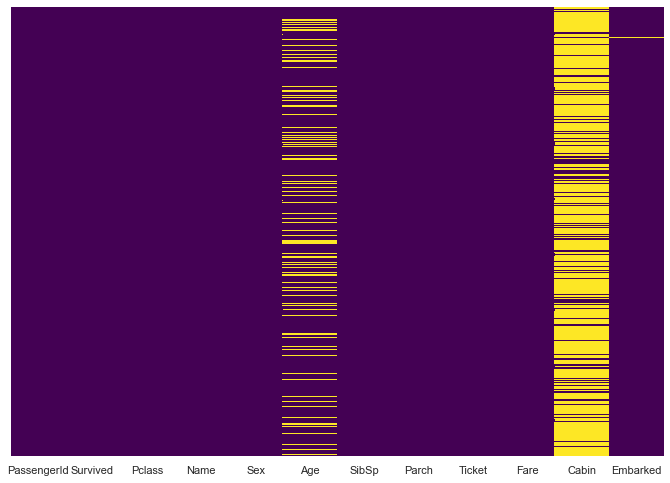

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As I said, it is necessary to replace values of the features 'Age', 'Cabin' and 'Embarked'.

To begin, I will eliminate the features that, according to my criteria, do not provide relevant information to solve the problem posed for this dataset.
These features will be:
* 'PassengerId': since it is not a real Id, but represents the same as the index that Pandas provides by default in the DataFrame.
* 'Name': this feature could be used in some way to know the passenger's title (ie. 'Sir.', 'Lady'), however it would not bring a big change in the predictions.
* 'Ticket': like the 'Name' feature, this would not contribute much to change the Machine Learning algorithm.
* 'Cabin': your information, like the 'Name' feature, could be used in some way, however the great lack of data makes it impossible to substitute them without affecting the subsequent ML algorithm.

In [9]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now, to impute the missing data of the ages, it is first necessary to study the variance between the 3 classes. It would be logical that if it existed because the trend of the time indicated that older people on board tended to be wealthier, and therefore access more expensive classes; vice versa for younger people.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

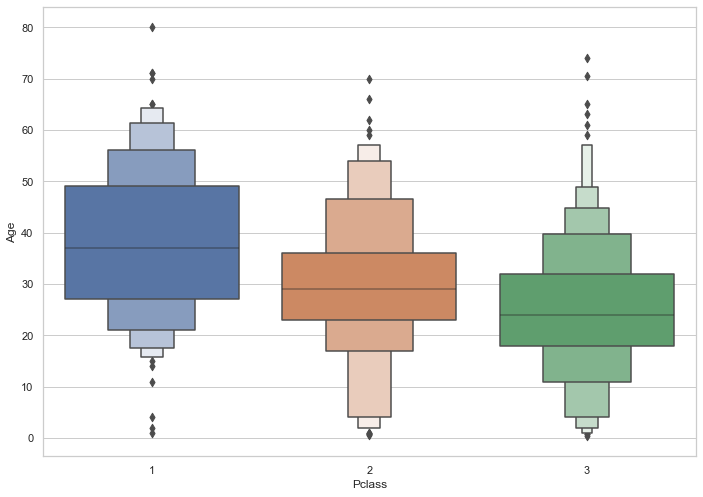

In [10]:
sns.boxenplot(x='Pclass', y='Age', data=train)

Indeed, it is corroborated that the mean age in class 3 is the highest and the mean in class 1 the lowest, therefore it would be incorrect to impute the missing data in the 'Age' feature with the global mean.

In order to correctly solve this problem, the following function was performed:

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return int(train[train['Pclass'].dropna()==1]['Age'].mean())
        elif Pclass == 2:
            return int(train[train['Pclass'].dropna()==2]['Age'].mean())
        else:
            return int(train[train['Pclass'].dropna()==3]['Age'].mean())
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

Finally, because only one piece of data is missing in the 'Embarked' feature and this represents a minimal loss of information, it will be removed.

In [12]:
train.dropna(inplace=True)

If we re-evaluate the dataset with the heatmap, we will see that there is no more missing data.

<AxesSubplot:>

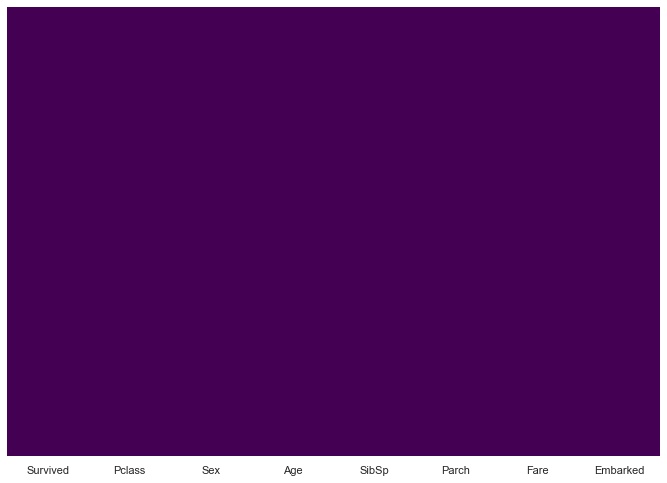

In [13]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Solving Categorical Features

For this part I will use Pandas' built in method .get_dummies to transform categorical features into numerical, which will be:
* 'Sex'
* 'Embarked'

Last, I will drop the original 'Sex' and 'Embarked' features.

In [14]:
sex = pd.get_dummies(data=train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

train = pd.concat([train,sex,embark], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
